## Import

In [2]:
import xarray as xr
import fsspec
import matplotlib.pyplot as p
import numpy as nc
from datetime import datetime

## Display Metadata


In [3]:
# Open the Zarr dataset.
mapper = fsspec.get_mapper('s3://gstp-benchmark/zarr/s2_hypercube.zarr/', anon=True)
dataset = xr.open_zarr(mapper)
# Display dataset metadata in the Standard output
print(dataset)

<xarray.Dataset>
Dimensions:    (Time: 10, Latitude: 10980, Longitude: 10980)
Coordinates:
  * Latitude   (Latitude) float64 4.5e+06 4.5e+06 4.5e+06 ... 4.39e+06 4.39e+06
  * Longitude  (Longitude) float64 2e+05 2e+05 2e+05 ... 3.098e+05 3.098e+05
  * Time       (Time) datetime64[ms] 2020-08-04T11:38:47 ... 2020-11-12T13:25:51
Data variables:
    Band1      (Time, Latitude, Longitude) float32 ...
    Band2      (Time, Latitude, Longitude) float32 ...
    Band3      (Time, Latitude, Longitude) float32 ...
    Band4      (Time, Latitude, Longitude) float32 ...


## Point -Average values per month, per year

In [4]:
# Regroup on the time axis
point = dataset['Band1'].sel(Longitude=199995, Latitude=4499985)
monthMeans = point.groupby("Time.month").mean("Time").data
yearMean=point.groupby("Time.year").mean("Time").data
print('4 month means:', monthMeans)
print('1 year mean:', yearMean)

4 month means: [ 422.5 1543.  1006.  1038.5]
1 year mean: [1056.9]


## Display a region - Single Time Instance

In [ ]:
dataset['Band1'].isel(Longitude=slice(0,10), Latitude=slice(0,10),Time=5).plot.pcolormesh(cmap='terrain')

## Display Region - Average value over time

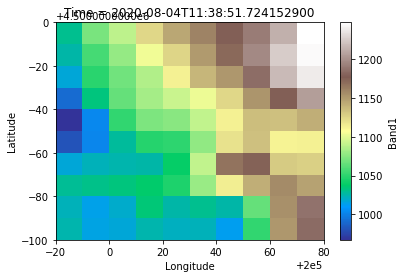

In [5]:
region = dataset['Band1'].isel(Longitude=slice(0,10), Latitude=slice(0,10))
averageRegion = region.coarsen(Time=10).mean().isel(Time=0);
averageRegion.plot.pcolormesh(cmap='terrain')
